# загрузим датасет

In [2]:
import pandas as pd
df = pd.read_csv("..//static//csv//car_price_prediction.csv", sep=",")
df


ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

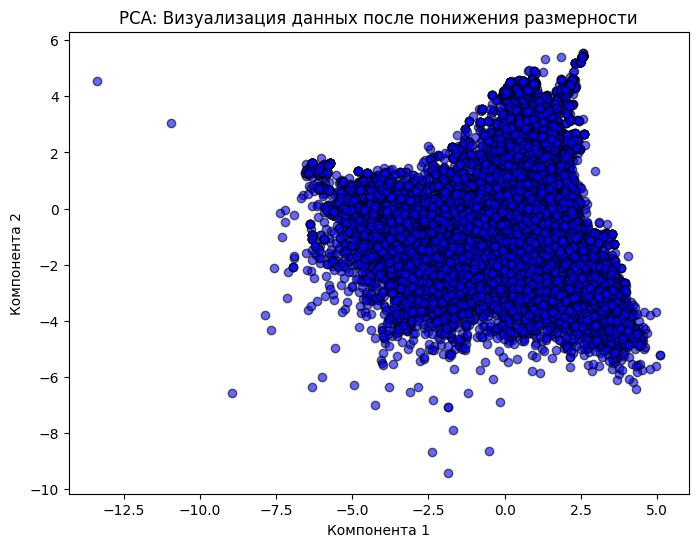

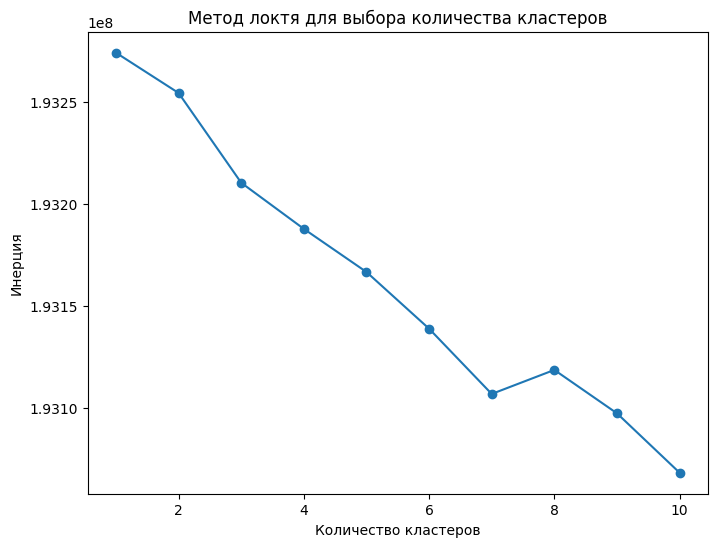

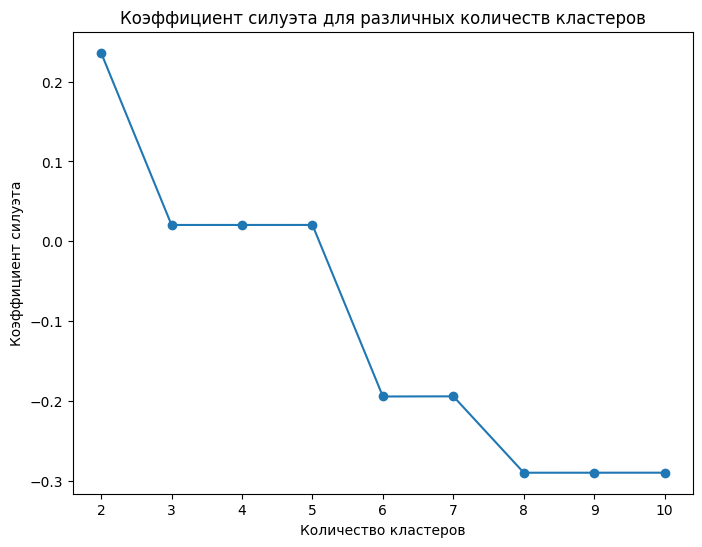

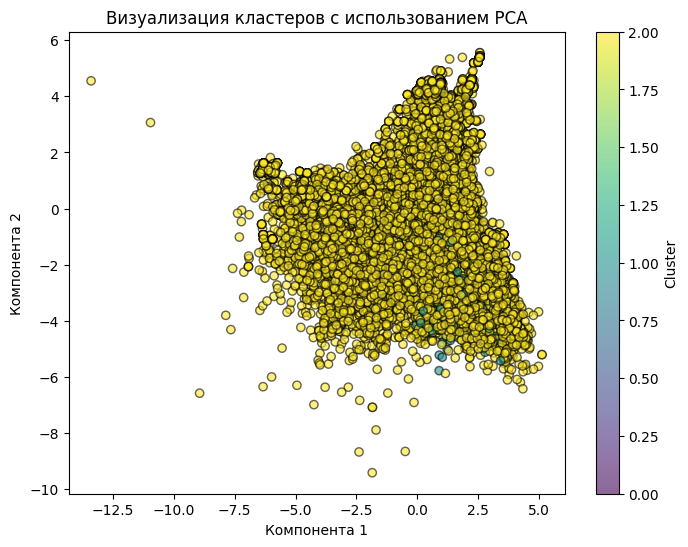

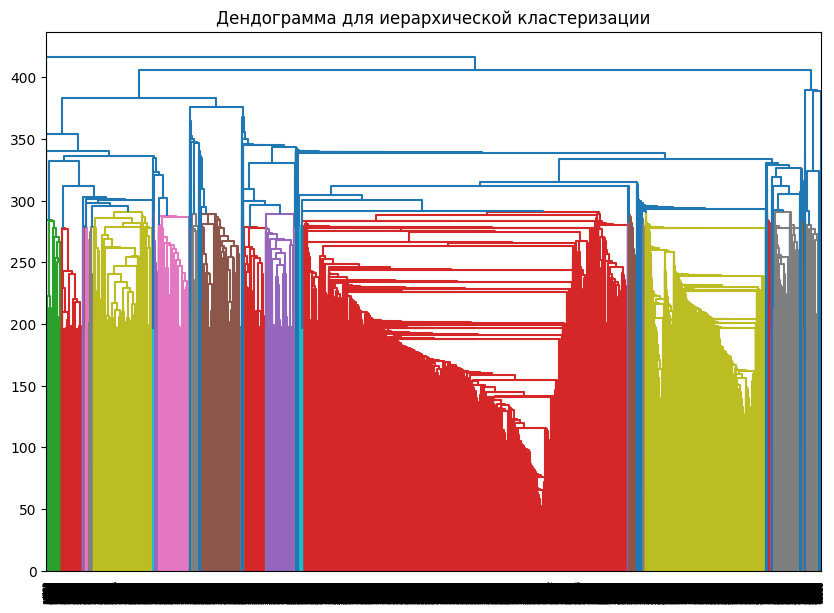

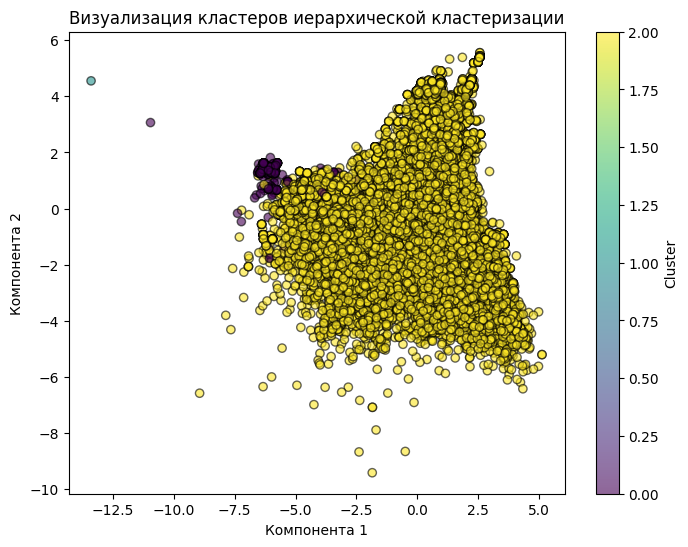

Коэффициент силуэта для K-means: 0.0203
Коэффициент силуэта для иерархической кластеризации: -0.1579


In [3]:
# Шаг 1: Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Шаг 2: Предобработка данных
# Удалим колонку ID, которая не имеет смысла для анализа
df = df.drop(columns=["ID"])

# Преобразуем категориальные переменные в числовые
df = pd.get_dummies(df, drop_first=True)

# Нормализуем данные (все числовые данные приводим к одному масштабу)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Шаг 3: Понижение размерности с помощью PCA для визуализации
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Визуализация данных после понижения размерности
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', edgecolor='k', alpha=0.6)
plt.title("PCA: Визуализация данных после понижения размерности")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

# Шаг 4: Выбор количества кластеров с помощью метода локтя и коэффициента силуэта
# Метод локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для выбора количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

# Метод силуэта
silhouette_scores = []
for k in range(2, 11):  # начинаем с 2, так как для одного кластера не имеет смысла вычислять силуэт
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Коэффициент силуэта для различных количеств кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

# Шаг 5: Кластеризация с выбранным количеством кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Визуализация кластеров на основе PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.6)
plt.title("Визуализация кластеров с использованием PCA")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.colorbar(label='Cluster')
plt.show()

# Шаг 6: Иерархическая кластеризация
Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Дендограмма для иерархической кластеризации")
plt.show()

# Применение иерархической кластеризации с выбранным количеством кластеров
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical Cluster'] = hierarchical.fit_predict(df_scaled)

# Визуализация кластеров для иерархической кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Hierarchical Cluster'], cmap='viridis', edgecolor='k', alpha=0.6)
plt.title("Визуализация кластеров иерархической кластеризации")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.colorbar(label='Cluster')
plt.show()

# Шаг 7: Оценка качества кластеризации
silhouette_kmeans = silhouette_score(df_scaled, df['Cluster'])
silhouette_hierarchical = silhouette_score(df_scaled, df['Hierarchical Cluster'])

print(f"Коэффициент силуэта для K-means: {silhouette_kmeans:.4f}")
print(f"Коэффициент силуэта для иерархической кластеризации: {silhouette_hierarchical:.4f}")
